<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This homework includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline


# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# you may need to change this depending on your own directory locations
sat_filepath = '/Users/KerryChowChow/DSI-SF-3-kelly/datasets/state_sat_scores/sat_scores.csv'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
sat_df=pd.DataFrame.from_csv(sat_filepath)
sat_df2=pd.read_csv(sat_filepath)
sat_df.dtypes
#takes the first column as index

Rate      int64
Verbal    int64
Math      int64
dtype: object

In [5]:
sat_df2.dtypes
#creates a separate column of index 

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
sat_df2['Rate']=sat_df2['Rate'].apply(lambda x: float(x))
sat_df2['Verbal']=sat_df2['Verbal'].apply(lambda x: float(x))
sat_df2['Math']=sat_df2['Math'].apply(lambda x: float(x))
#'State' means the state in the US
# it's unclear what Rate means. My first guess is the ranking of highest sum of Verbal and Math test scores.
#After checking a few rows, it seems incorrect. Though it does seems like the lower the Rate is, the higher the Verbal
#and Math tests are. 
# 'Verbal' means the average verbal test score and 'Math' means the average math test score

In [5]:
sat_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null float64
Verbal    52 non-null float64
Math      52 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
sat_df2.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

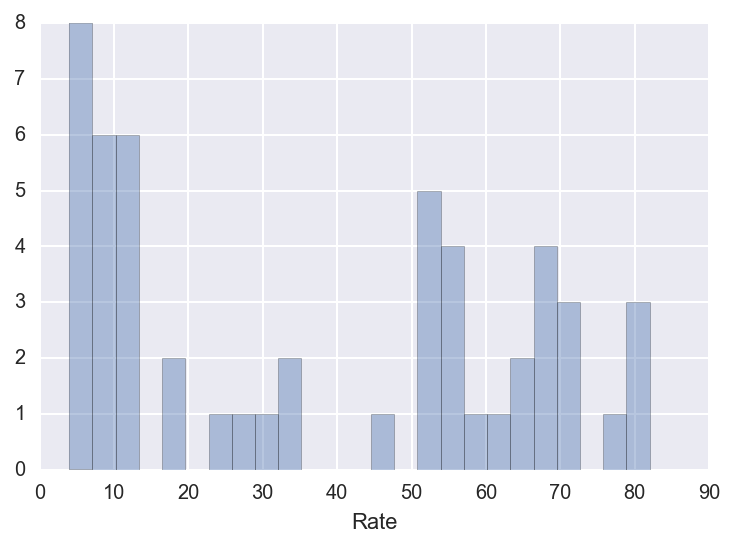

In [34]:
import seaborn as sns
sns.distplot(sat_df2['Rate'],hist=True, bins=25, kde=False)


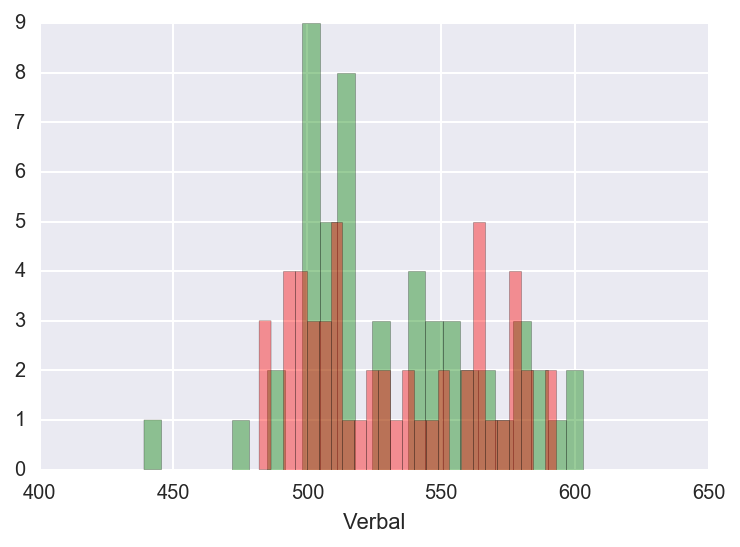

In [37]:
sns.distplot(sat_df2['Math'],hist=True, bins=25, kde=False, color='g')
sns.distplot(sat_df2['Verbal'],hist=True, bins=25, kde=False, color='r')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

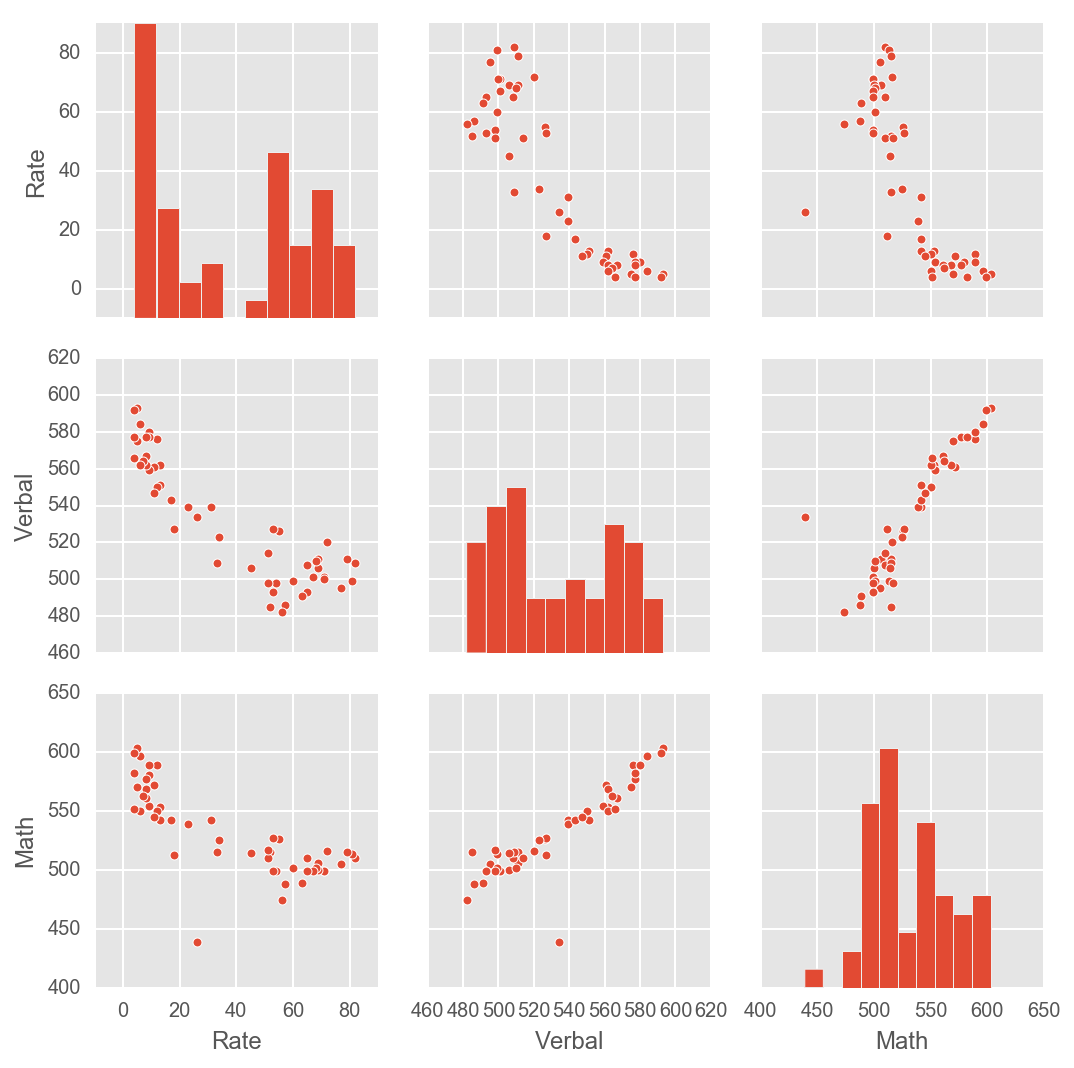

In [60]:
sns.pairplot(sat_df2)
#the graph shows that
#1: the higher the Math and Verbal test scores are, the lower the Rate is
#2: the higher the Math score is, the higher the Verbal score is

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

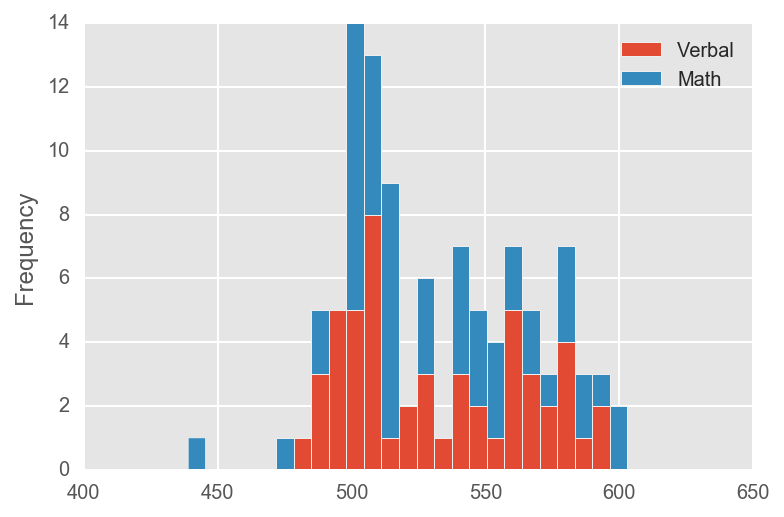

In [64]:
import matplotlib as plt
plt.style.use('ggplot')
sat_df4=pd.DataFrame(sat_df2, columns=['Verbal','Math'])
sat_df4.plot.hist(stacked=True, bins=25)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

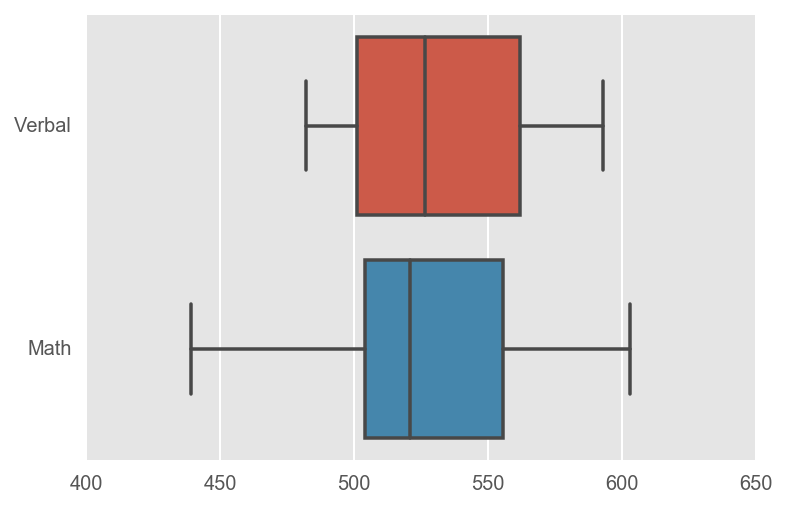

In [68]:
sns.boxplot(sat_df4, orient="h")

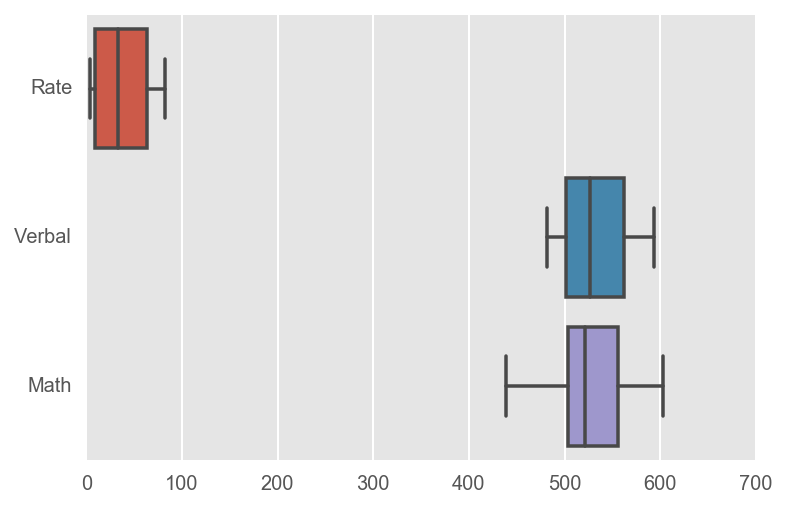

In [69]:
sns.boxplot(sat_df2, orient='h')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


//anaconda/envs/dsi/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


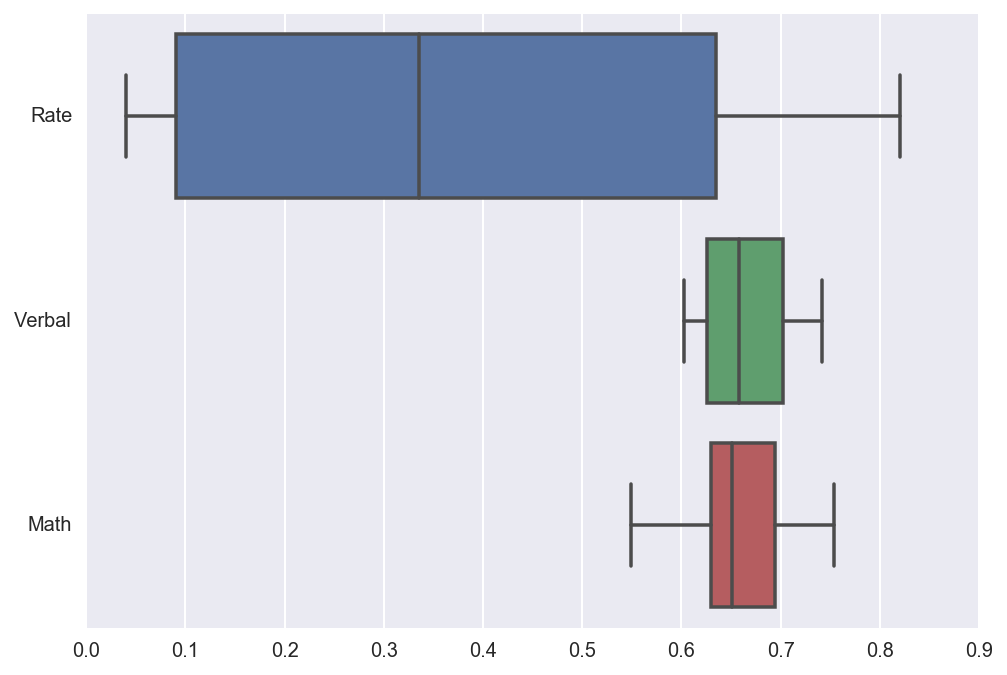

In [12]:
import seaborn as sns
# turn the numbers into percentage. Assuming the full scores for Verbal and Math are 800
sat5=pd.DataFrame(sat_df2, columns=['Rate','Verbal','Math'])
sat5['Verbal']=sat5['Verbal'].apply(lambda x: x/800)
sat5['Math']=sat5['Math'].apply(lambda x: x/800)
sat5['Rate']=sat5['Rate'].apply(lambda x: x/100)
sns.boxplot(sat5, orient='h')

#now there's a little more overlap now, but still not good enough. 

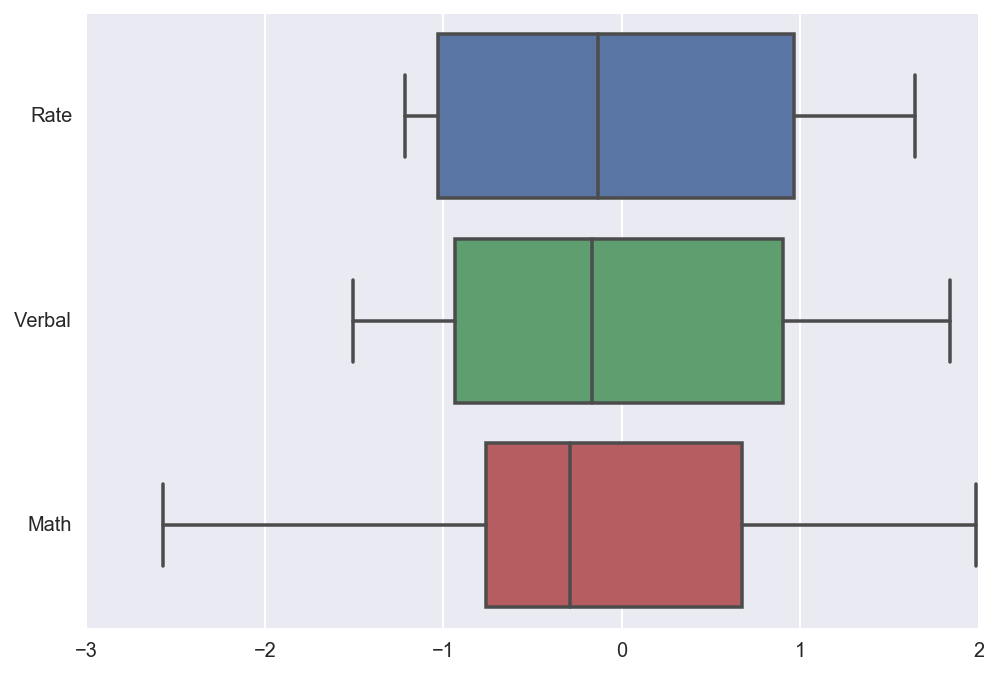

In [15]:
sat_mean=sat5.mean()
sat_std=sat5.std()
sat_norm = (sat5 - sat_mean) / sat_std
sns.boxplot(sat_norm, orient='h')

In [81]:
sat5.head(5)

,Rate,Verbal,Math
0,0.82,0.63625,0.63750
1,0.81,0.62375,0.64125
2,0.79,0.63875,0.64375
3,0.77,0.61875,0.63125
4,0.72,0.65000,0.64500


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [9]:
verbal_avg

532.0192307692307

In [10]:
verbal_avg=sat_df2.Verbal.mean()
verbal_above_avg=sat_df2.loc[sat_df2['Verbal']>verbal_avg,'State']
pd.DataFrame(verbal_above_avg)

#24 states are above the mean. It means that more than half of the states are performing below average
#while there's a greater gap between the mean and the best-performing states. 
#Meaning that there are more states that are doing better than the average. And among those, there are a few
#of them that are out-performing the rest of the states.


,State
26,CO
27,OH
28,MT
30,ID
31,TN
32,NM
33,IL
34,KY
35,WY
36,MI


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [105]:
verbal_median=sat_df2['Verbal'].median()
print verbal_median

526.5


In [111]:
verbal_above_medium=sat_df2.loc[sat_df2['Verbal']>verbal_median,'State']
pd.DataFrame(verbal_above_medium)


,State
19,WA
26,CO
27,OH
28,MT
29,WV
30,ID
31,TN
32,NM
33,IL
34,KY


In [112]:
print verbal_above_avg.count()
print verbal_above_medium.count()

#there are more states that have higher verbal score than medium than in mean. Esp, with WA and WV.
#it implies that these two states might have a larger std than others

24
26


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [115]:
sat_df2['Diff']=(sat_df2['Verbal']-sat_df2['Math'])

In [116]:
sat_df2['Diff']

0     -1.0
1    -14.0
2     -4.0
3    -10.0
4      4.0
5      2.0
6      1.0
7      5.0
8      6.0
9      9.0
10     2.0
11    -2.0
12    -6.0
13     2.0
14    -2.0
15    -2.0
16     8.0
17     0.0
18    -1.0
19     0.0
20    -6.0
21   -30.0
22     4.0
23   -19.0
24    -2.0
25    -6.0
26    -3.0
27    95.0
28     0.0
29    15.0
30     1.0
31     9.0
32     9.0
33   -13.0
34     0.0
35     2.0
36   -11.0
37    -9.0
38    -3.0
39     5.0
40    -6.0
41     6.0
42     0.0
43     2.0
44   -12.0
45    12.0
46     5.0
47   -10.0
48    -5.0
49    -7.0
50    15.0
51    -8.0
Name: Diff, dtype: float64

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [124]:
sat_largerV=sat_df2.sort(['Diff'],ascending=False)[:10]
sat_largerV

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,State,Rate,Verbal,Math,Diff
27,OH,26.0,534.0,439.0,95.0
50,MS,4.0,566.0,551.0,15.0
29,WV,18.0,527.0,512.0,15.0
45,AR,6.0,562.0,550.0,12.0
32,NM,13.0,551.0,542.0,9.0
31,TN,13.0,562.0,553.0,9.0
9,VA,68.0,510.0,501.0,9.0
16,DC,56.0,482.0,474.0,8.0
8,ME,69.0,506.0,500.0,6.0
41,OK,8.0,567.0,561.0,6.0


In [126]:
sat_largerM=sat_df2.sort(['Diff'],ascending=True)[:10]
sat_largerM
#is it because there are more Asians living in Hawaii, California and Bew Jersey?

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,State,Rate,Verbal,Math,Diff
21,HI,52.0,485.0,515.0,-30.0
23,CA,51.0,498.0,517.0,-19.0
1,NJ,81.0,499.0,513.0,-14.0
33,IL,12.0,576.0,589.0,-13.0
44,WI,6.0,584.0,596.0,-12.0
36,MI,11.0,561.0,572.0,-11.0
3,NY,77.0,495.0,505.0,-10.0
47,IA,5.0,593.0,603.0,-10.0
37,MN,9.0,580.0,589.0,-9.0
51,All,45.0,506.0,514.0,-8.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [127]:
sat_df2.corr()
# it shows that states tend to get lower rate faster when they perform well in Verbal test than in Math
#there's a strong correlation between the performances of Math and Verbal. 


,Rate,Verbal,Math,Diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diff,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [128]:
sat_df2.describe()
#'count' returns the number of rows under the certain column
#'mean' returns the average
#std is the standard deviation. We can see how wide the range is for each column
#min is the minimum number in the column
#max is the maximum number in the column
#25% is the last number of the first quartile
#50% is the last number of the second quartile or the Medium
#75% is the last number of the third quartile


,Rate,Verbal,Math,Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [129]:
sat_df2.cov()
# it's easier to investigate the relationships among each variable 
#when the unit are the same. In correlation, every number is under 1

,Rate,Verbal,Math,Diff
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Diff,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [16]:
# again dataset location might be different on your computer
drug_data_filepath = '/Users/KerryChowChow/DSI-SF-3-kelly/datasets/drug_use_by_age/drug-use-by-age.csv'

In [17]:
drug=pd.read_csv(drug_data_filepath)
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [5]:
drug.info()
#it seems like there are a few missing values that are replaced by '-'
#and some age element was displayed as a range


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [6]:
drug[['heroin-use','heroin-frequency','inhalant-use','inhalant-frequency']]


,heroin-use,heroin-frequency,inhalant-use,inhalant-frequency
0,0.1,35.5,1.6,19.0
1,0.0,-,2.5,12.0
2,0.1,2.0,2.6,5.0
3,0.2,1.0,2.5,5.5
4,0.1,66.5,3.0,3.0
5,0.1,64.0,2.0,4.0
6,0.4,46.0,1.8,4.0
7,0.5,180.0,1.4,3.0
8,0.9,45.0,1.5,4.0
9,0.6,30.0,1.4,2.0


In [16]:
drug['age'].unique()
#and some age element was displayed as a range

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'], dtype=object)

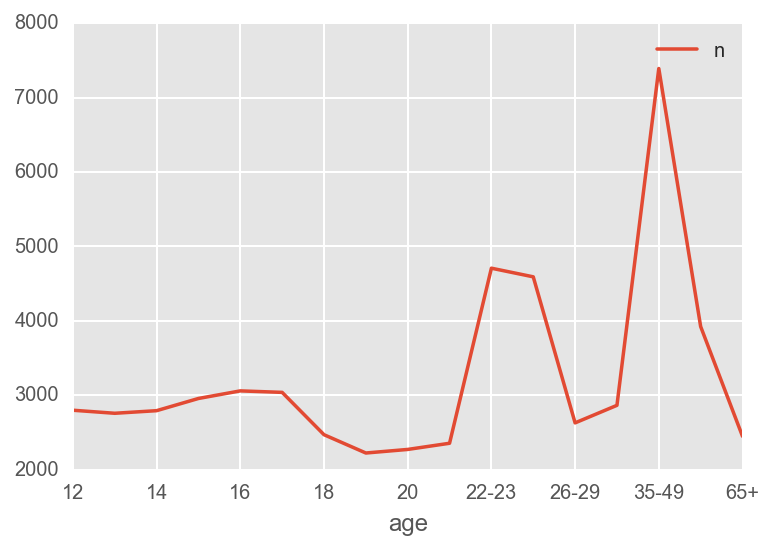

In [149]:
drug.plot(x='age', y='n')
#given how the data was entered. The distribution will 

# Data Cleaning

In [7]:
#by looking at the table, it seems like a cell received a '-' when the previous column is 0.0. 
#That means we can convert the string '-' to float 0.0.

In [11]:
drug.iloc[16]
#however, when you look at people who are 65 years or older, some of the data doesn't look right
#for example, it got a 0 for stimulant-use but 364 for stimulant-frequency.
#one part I'm unsure about is the units being used for frequency here.

age                          65+
n                           2448
alcohol-use                 49.3
alcohol-frequency             52
marijuana-use                1.2
marijuana-frequency           36
cocaine-use                    0
cocaine-frequency              -
crack-use                      0
crack-frequency                -
heroin-use                     0
heroin-frequency           120.0
hallucinogen-use             0.1
hallucinogen-frequency         2
inhalant-use                   0
inhalant-frequency             -
pain-releiver-use            0.6
pain-releiver-frequency       24
oxycontin-use                  0
oxycontin-frequency            -
tranquilizer-use             0.2
tranquilizer-frequency         5
stimulant-use                  0
stimulant-frequency          364
meth-use                       0
meth-frequency                 -
sedative-use                   0
sedative-frequency            15
Name: 16, dtype: object

In [18]:

drug_clean=drug.replace(to_replace='-', value=float(0.0), inplace=False)

In [34]:
#drug_clean.loc[0:,'alcohol-use':'sedative-frequency']=drug_clean.loc[0:,'alcohol-use':'sedative-frequency'].apply(lambda x: float(x))

In [19]:
drug_clean['cocaine-frequency']=drug_clean['cocaine-frequency'].apply(lambda x: float(x) if type(x)==str else x)
#['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency'], axis=1]=drug_clean[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']

In [20]:
drug_clean['crack-frequency']=drug_clean['crack-frequency'].apply(lambda x: float(x) if type(x)==str else x)

In [21]:
drug_clean['meth-frequency']=drug_clean['meth-frequency'].apply(lambda x: float(x) if type(x)==str else x)

In [22]:
drug_clean['heroin-frequency']=drug_clean['heroin-frequency'].apply(lambda x: float(x) if type(x)==str else x)
drug_clean['inhalant-frequency']=drug_clean['inhalant-frequency'].apply(lambda x: float(x) if type(x)==str else x)
drug_clean['oxycontin-frequency']=drug_clean['oxycontin-frequency'].apply(lambda x: float(x) if type(x)==str else x)


In [23]:
drug_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [144]:
drug.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [24]:
drug_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
crack-frequency,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1


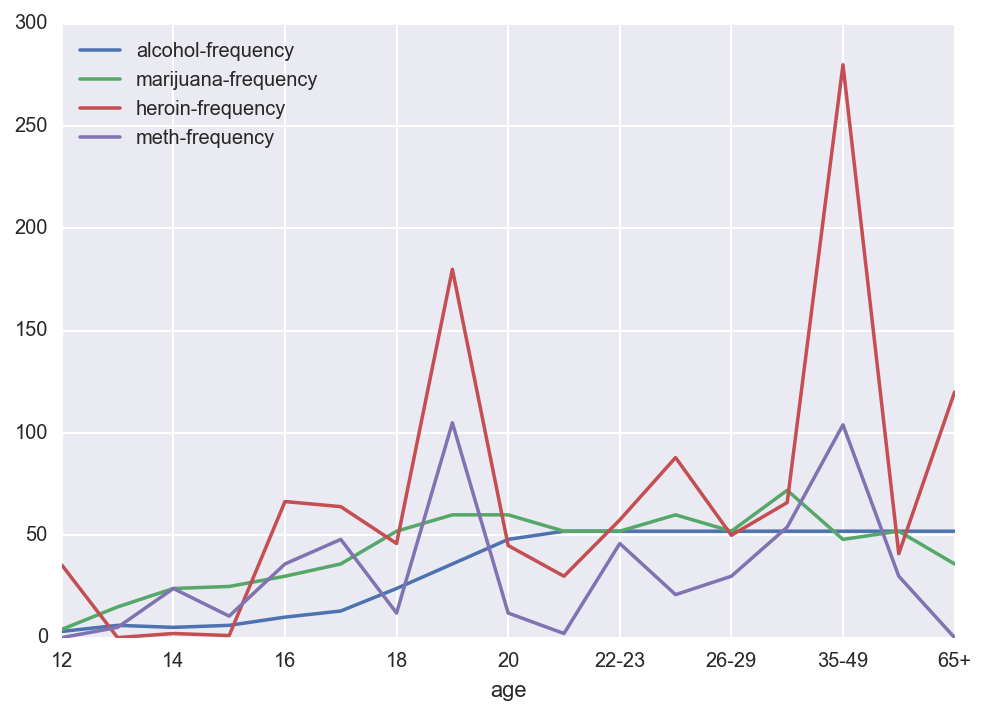

In [122]:

drug_clean.plot(x='age',y=['alcohol-frequency','marijuana-frequency','heroin-frequency','meth-frequency'])
# I took out the frequency of these drugs because they have the highest frequency than other drugs
#it seems like alcohol-frequency gets very stable after people passed 21
#heroin-frequency is the highest when people are in college age or are in the middle-age-crisis age range
#meth-frequency is sporadic
# the use of marijuana is more frequent than drug in a steady rate. It basically remain steady after 18, then dropped a bit when 65+

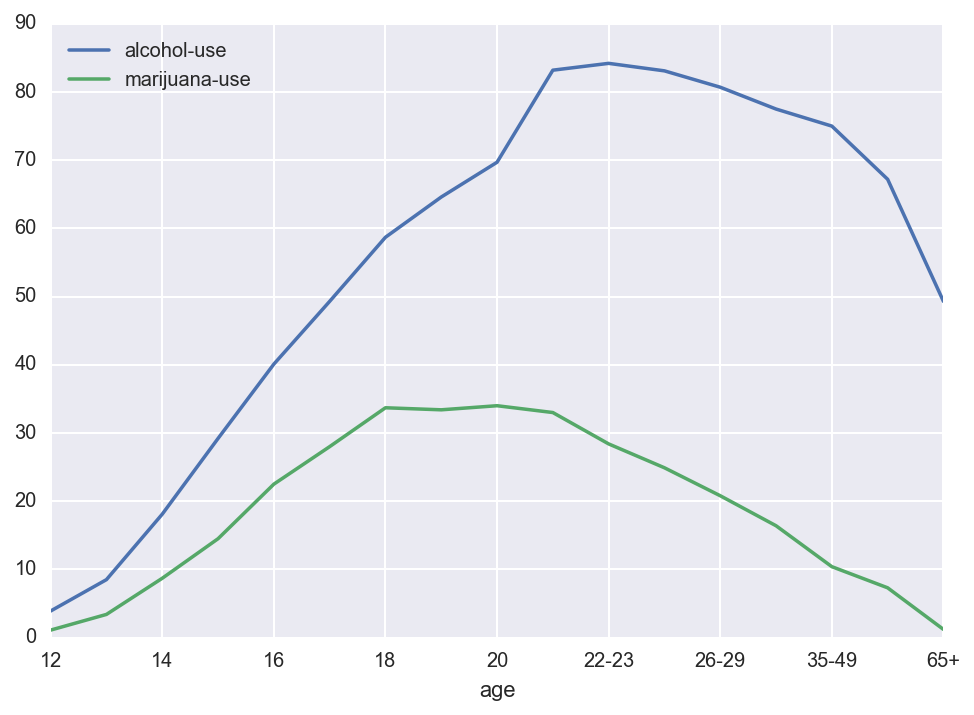

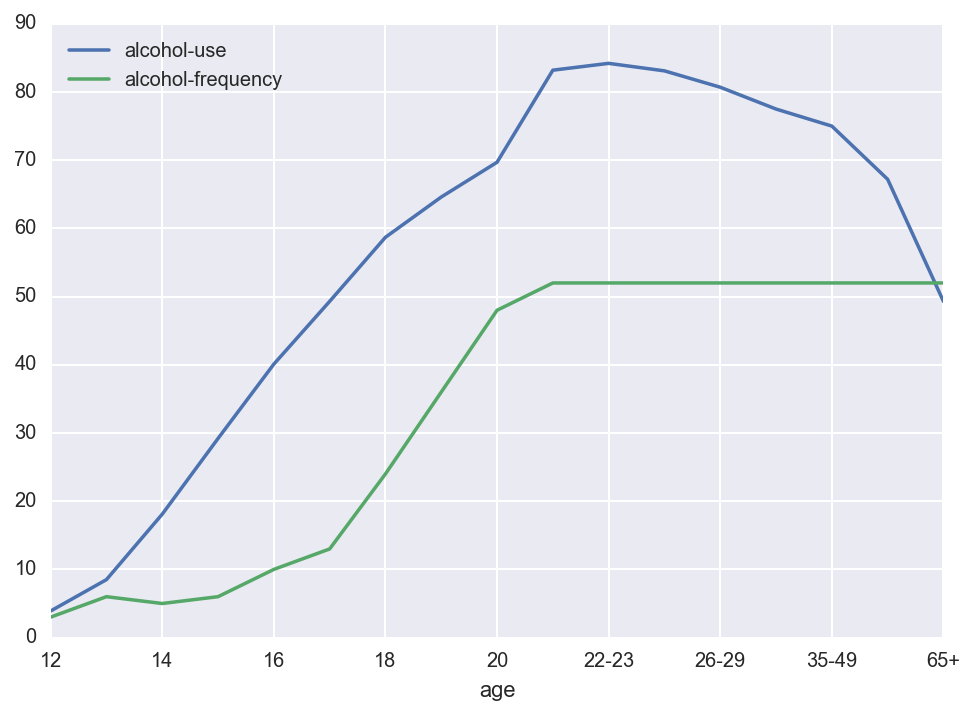

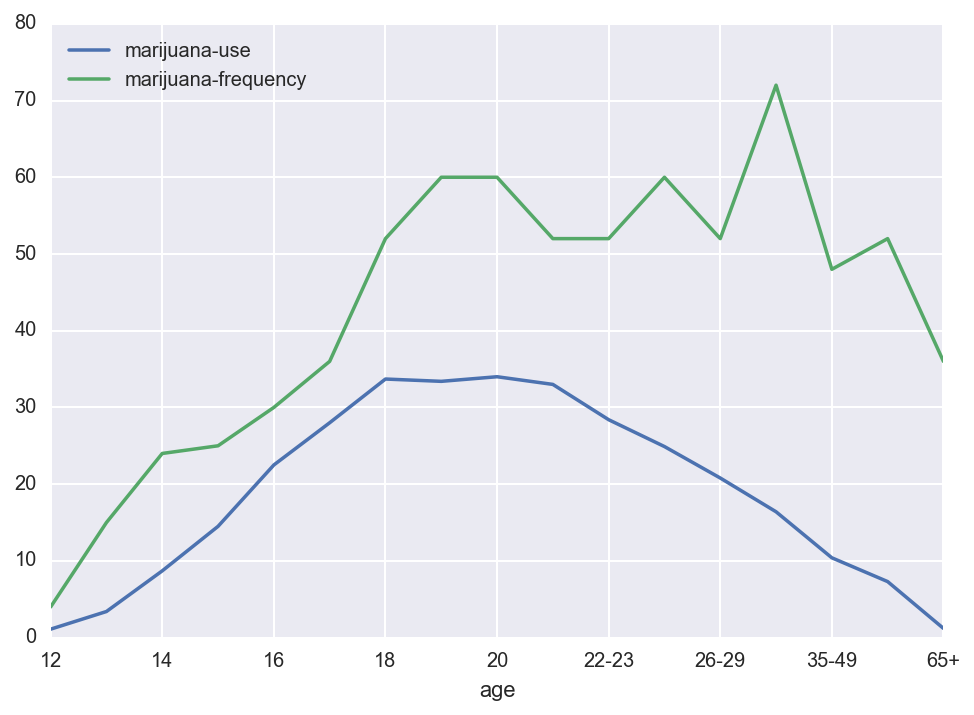

In [126]:
drug_clean.plot(x='age',y=['alcohol-use','marijuana-use'])
drug_clean.plot(x='age',y=['alcohol-use','alcohol-frequency'])
drug_clean.plot(x='age',y=['marijuana-use','marijuana-frequency'])
#[graph-1]: people use less alcohol and marijuana around the same age of 21
#[graph-2]: more people stopped drinking alcohol around 21, but those who continue to drink remain the same frequency of drinking

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [127]:
#Question: want to see if there're any correlations of the increase of other drug uses when people start drinking alcohol more frequently
# deliverables: a scatterplot


In [79]:
drug_clean.corr().T
#by a quick look, it seems like there are some correlations

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.388318,0.281797,0.574629,0.007798,...,-0.166039,0.021226,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.510735,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.260301,0.877378,0.337802,0.677614,...,0.589219,-0.033615,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.376863,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.317172,0.785050,0.364267,0.546194,...,0.251554,0.049388,0.448543,-0.415026,0.291766,0.260304,0.425153,0.252246,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.154879,0.620670,-0.143323,0.711613,...,0.971733,-0.180840,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.218681,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.265193,0.892077,0.273167,0.631789,...,0.609618,0.066200,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.417947,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.077848,0.835727,-0.076876,0.899944,...,0.865626,0.017269,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.199366,0.461914,-0.159997
cocaine-frequency,0.388318,0.260301,0.317172,-0.154879,0.265193,-0.077848,1.000000,0.307329,0.872260,-0.127827,...,-0.152548,-0.154491,-0.080911,-0.103142,-0.230324,-0.183692,-0.080921,0.240660,0.021109,0.761572
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.307329,1.000000,0.333440,0.750790,...,0.603003,0.140619,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.404741,0.438421,0.091676
crack-frequency,0.574629,0.337802,0.364267,-0.143323,0.273167,-0.076876,0.872260,0.333440,1.000000,-0.217811,...,-0.187504,-0.115546,-0.080356,-0.215342,-0.219458,-0.125405,-0.070355,0.346559,0.129511,0.602101
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.127827,0.750790,-0.217811,1.000000,...,0.775321,0.112525,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.058656,0.333649,-0.023708


In [86]:
import matplotlib.pyplot as plt


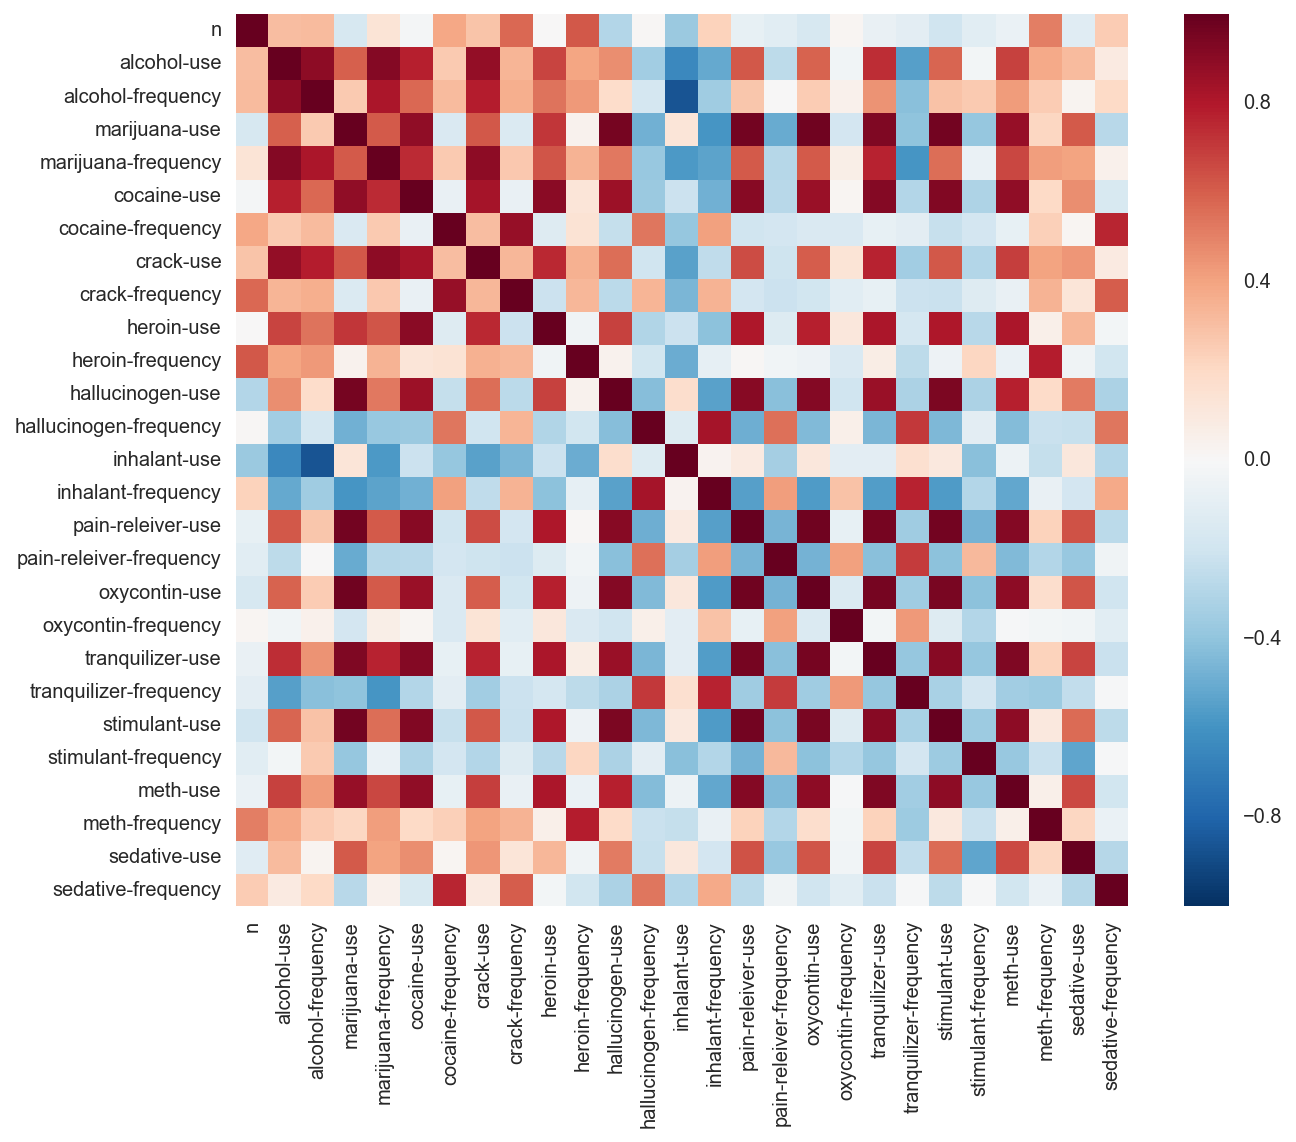

In [91]:
fig=plt.figure(figsize=(10,8))
ax=fig.gca()
sns.heatmap(drug_clean.corr(), ax=ax)

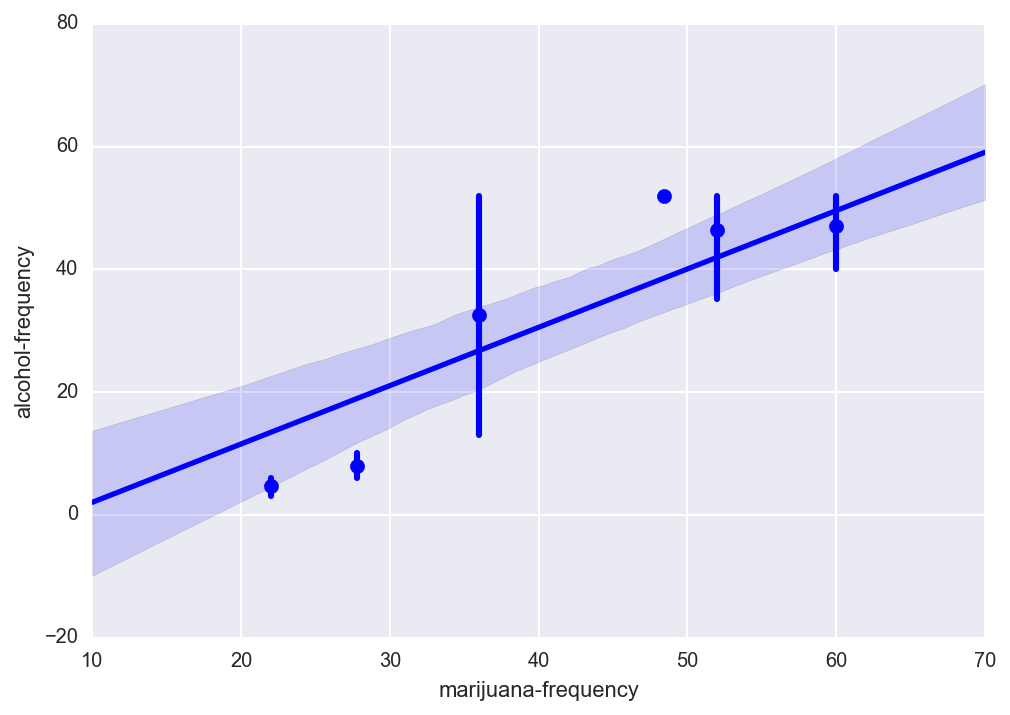

In [51]:
sns.regplot(drug_clean['marijuana-frequency'],drug_clean['alcohol-frequency'], color='b', x_bins=8)


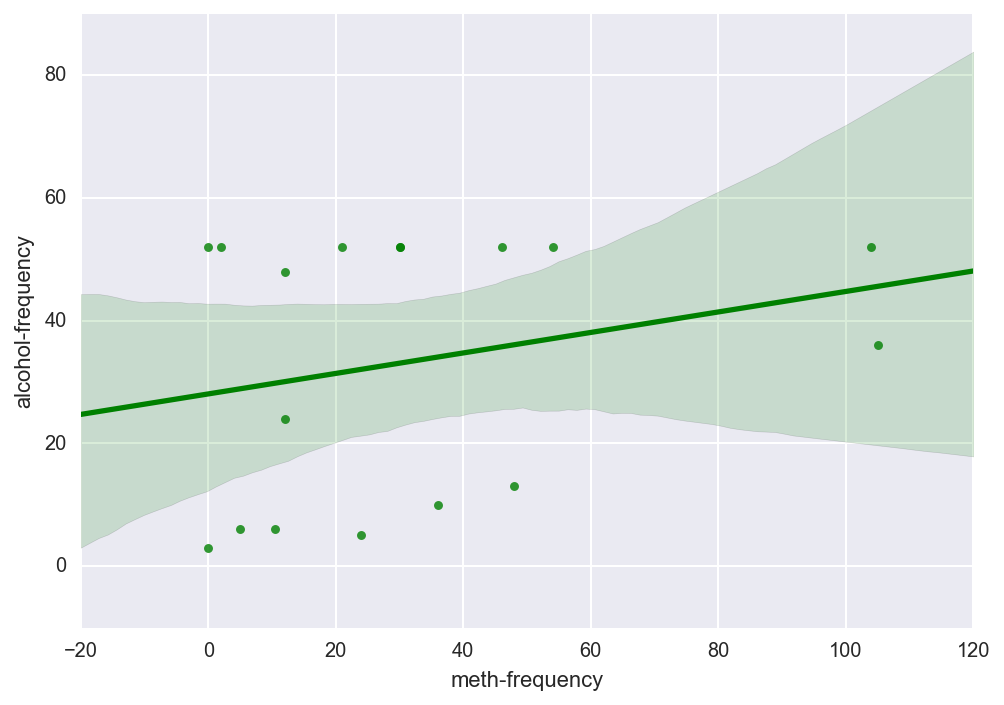

In [44]:
sns.regplot(drug_clean['meth-frequency'],drug_clean['alcohol-frequency'], color='g')


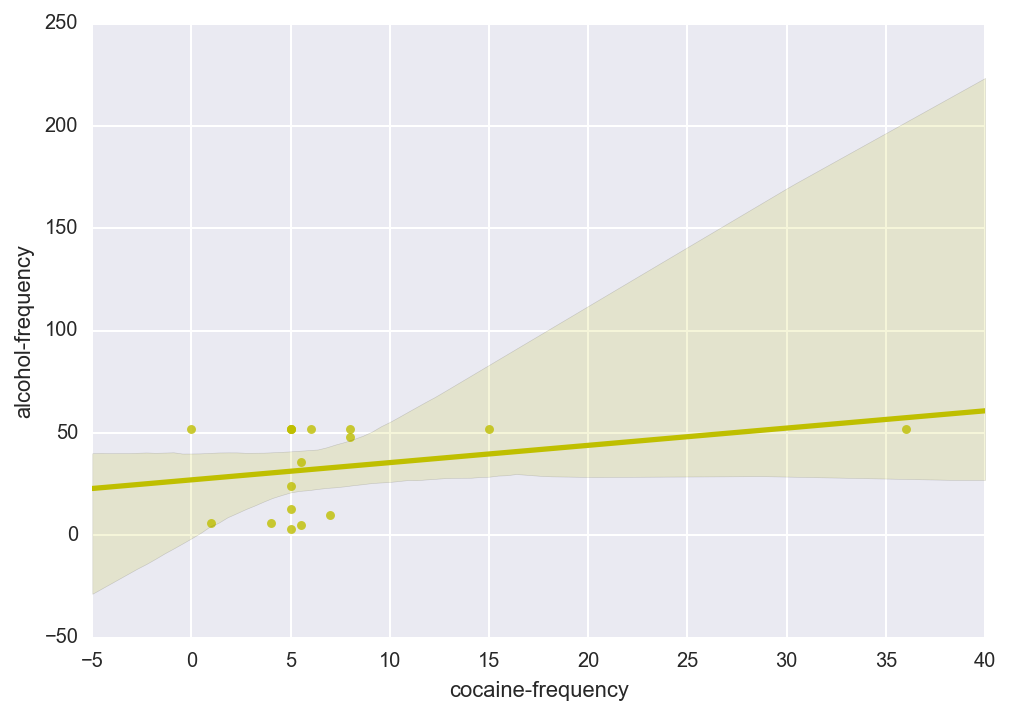

In [45]:
sns.regplot(drug_clean['cocaine-frequency'],drug_clean['alcohol-frequency'], color='y')


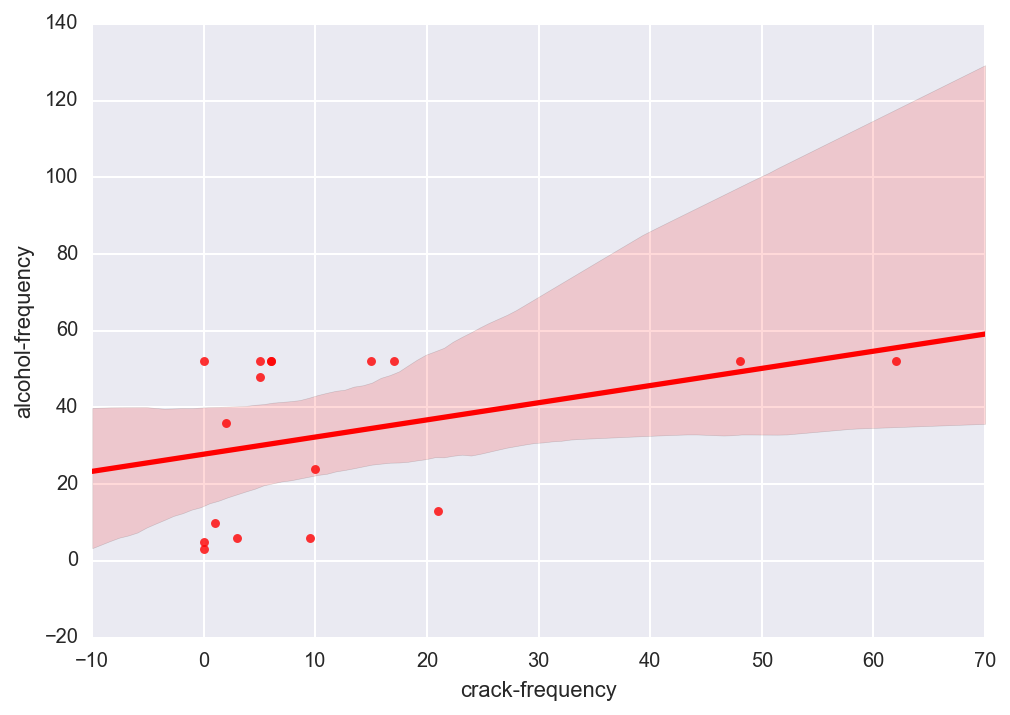

In [46]:
sns.regplot(drug_clean['crack-frequency'],drug_clean['alcohol-frequency'], color='r')


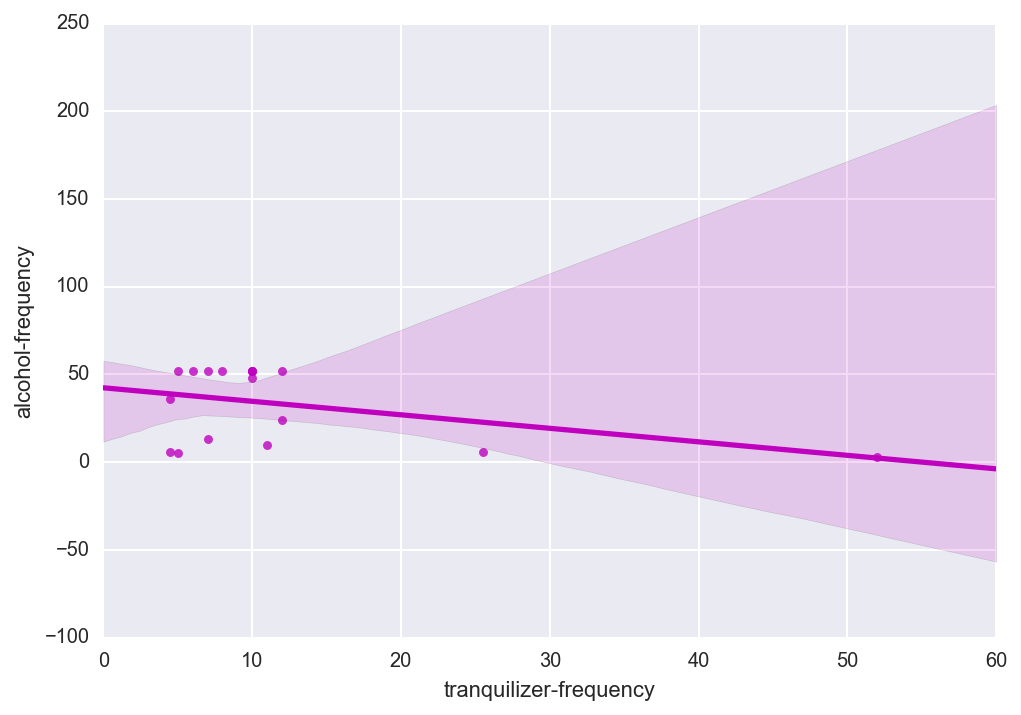

In [53]:
sns.regplot(drug_clean['tranquilizer-frequency'],drug_clean['alcohol-frequency'], color='m')

In [54]:
#if everyone reduced drugs-intake after turning in 21

In [66]:
drug_over21 = drug_clean[drug_clean['age']>'21']
drug_under21 = drug_clean[drug_clean['age']<='21']

In [71]:
drug_over21

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,5.0,0.0,364.0,0.0,0.0,0.0,15.0


In [75]:
drug_over21_use=drug_over21.iloc[:,2::2]

In [93]:
drug_over21_use.mean()

alcohol-use          73.857143
marijuana-use        15.628571
cocaine-use           2.314286
crack-use             0.400000
heroin-use            0.428571
hallucinogen-use      2.242857
inhalant-use          0.471429
pain-releiver-use     5.785714
oxycontin-use         0.828571
tranquilizer-use      2.857143
stimulant-use         1.542857
meth-use              0.385714
sedative-use          0.242857
dtype: float64

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.